# Sales Price Prediction 

### Importing required libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.DataFrame(pd.read_csv('C:/Users/niran/Desktop/My datasets and texts/Advertising.csv'))

#### A glimpse of the data

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Data cleaning and exploration

In [9]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
df.shape

(200, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### EDA - Data Visualization

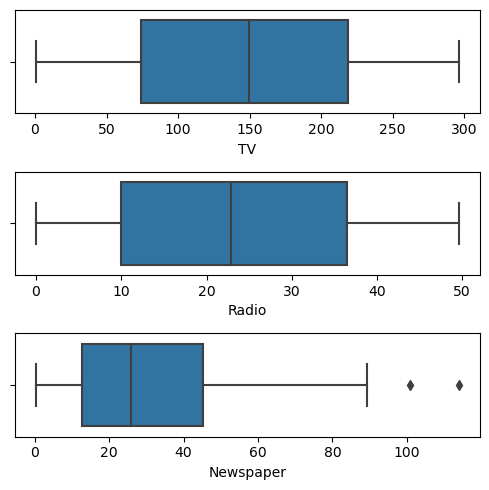

In [13]:
fig, axs = plt.subplots(3, figsize=(5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Radio'],ax=axs[1])
plt3=sns.boxplot(df['Newspaper'],ax=axs[2])
plt.tight_layout()

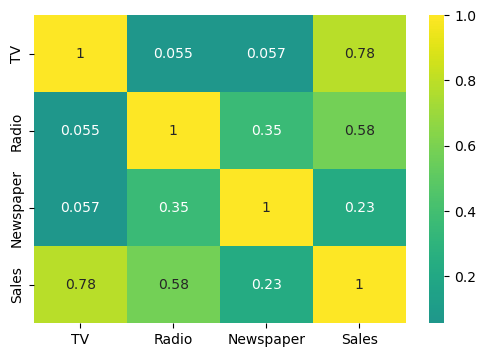

In [16]:
corr_mat=df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat,annot=True, cmap='viridis', center=0)
plt.show()

### Model training and testing

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
X=df.drop(['Sales'],axis=1)
y=df['Sales']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
models=[
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
]

In [32]:
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test, y_pred)
    r2=r2_score(y_test, y_pred)
    
    print(model)
    print(f'Mean Squared Error is: {mse:.2f}')
    print(f'R-squared is: {r2:.2f}')
    print()
    print("****************************************************************************")

LinearRegression()
Mean Squared Error is: 3.17
R-squared is: 0.90

****************************************************************************
RandomForestRegressor(random_state=42)
Mean Squared Error is: 0.59
R-squared is: 0.98

****************************************************************************
GradientBoostingRegressor(random_state=42)
Mean Squared Error is: 0.53
R-squared is: 0.98

****************************************************************************


### Model Summary

**The model with highest R squared score and least MSE is Gradient Boosting model.**